In [1]:
# what is the relationship between the results and circuits? 

In [2]:
# import packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# import datasets

results_raw = pd.read_csv("data_raw/results.csv")
circuits_raw = pd.read_csv("data_raw/circuits.csv")
races_raw = pd.read_csv("data_raw/races.csv")
lap_times_raw = pd.read_csv("data_raw/lap_times.csv")


In [4]:
# rename columns

results_rename = {"time":"results_time", "milliseconds":"results_milliseconds"}
results = results_raw.rename(columns = results_rename)

circuits_rename = {"name":"circuit_name"}
circuits = circuits_raw.rename(columns = circuits_rename)

lap_rename = {"time":"lap_time", "milliseconds":"lap_milliseconds"}
lap_times = lap_times_raw.rename(columns = lap_rename)


In [5]:
# merge datasets

circuits_races_merge = pd.merge(circuits[['circuitId', 'country', 'circuit_name']],
                                races_raw[['raceId', 'year', 'circuitId']],
                                on = "circuitId",
                                how = "left")

circuits_races_merge

circuits_races_results_merge = pd.merge(circuits_races_merge,
                                        results[['raceId', 'constructorId', 'results_milliseconds', 'points', 'fastestLapSpeed', 'statusId']],
                                        on = "raceId",
                                        how = "left")

circuits_races_results_merge

formula1_merge = pd.merge(circuits_races_results_merge,
                          lap_times[['raceId', 'driverId', 'lap_milliseconds']],
                          on = "raceId",
                          how = "left")

formula1_merge


,circuitId,country,circuit_name,raceId,year,constructorId,results_milliseconds,points,fastestLapSpeed,statusId,driverId,lap_milliseconds
0,1,Australia,Albert Park Grand Prix Circuit,1,2009,23.0,5655784,10.0,216.891,1.0,1.0,109088.0
1,1,Australia,Albert Park Grand Prix Circuit,1,2009,23.0,5655784,10.0,216.891,1.0,1.0,93740.0
2,1,Australia,Albert Park Grand Prix Circuit,1,2009,23.0,5655784,10.0,216.891,1.0,1.0,91600.0
3,1,Australia,Albert Park Grand Prix Circuit,1,2009,23.0,5655784,10.0,216.891,1.0,1.0,91067.0
4,1,Australia,Albert Park Grand Prix Circuit,1,2009,23.0,5655784,10.0,216.891,1.0,1.0,92129.0
...,...,...,...,...,...,...,...,...,...,...,...,...
11479420,79,USA,Miami International Autodrome,1078,2022,51.0,\N,0.0,203.520,47.0,20.0,94298.0
11479421,79,USA,Miami International Autodrome,1078,2022,51.0,\N,0.0,203.520,47.0,20.0,94217.0
11479422,79,USA,Miami International Autodrome,1078,2022,51.0,\N,0.0,203.520,47.0,20.0,93631.0
11479423,79,USA,Miami International Autodrome,1078,2022,51.0,\N,0.0,203.520,47.0,20.0,119970.0


In [6]:
# clean the data (get rid of NaN)

formula1_merge.dtypes

formula1_merge["results_milliseconds"].str.isnumeric()
formula1_merge["fastestLapSpeed"].str.isnumeric()

subset_results = formula1_merge.query("results_milliseconds.str.isnumeric() == False") # tells us which rows have values that are not numeric
list_unique_results_millseconds = pd.unique(subset_results["results_milliseconds"])
print(list_unique_results_millseconds) # tells us what these non-numeric values are

list_old_results = ['\\N']
list_new_results = [np.nan]
formula1_merge["results_milliseconds"] = formula1_merge['results_milliseconds'].replace(list_old_results, list_new_results)
formula1_merge["results_milliseconds_numeric"] = pd.to_numeric(formula1_merge["results_milliseconds"])

subset_speed = formula1_merge.query("fastestLapSpeed.str.isnumeric() == False")
list_unique_speed = pd.unique(subset_speed["fastestLapSpeed"])
print(list_unique_speed)

list_old_speed = ['\\N']
list_new_speed = [np.nan]
formula1_merge["fastestLapSpeed"] = formula1_merge['fastestLapSpeed'].replace(list_old_speed, list_new_speed)

formula1_merge["fastestLapSpeed_numeric"] = pd.to_numeric(formula1_merge["fastestLapSpeed"])
display(formula1_merge)

formula1_clean = formula1_merge.dropna()
formula1_clean


['\\N']
['216.891' '214.344' '214.706' ... '208.351' '208.423' '203.520']


,circuitId,country,circuit_name,raceId,year,constructorId,results_milliseconds,points,fastestLapSpeed,statusId,driverId,lap_milliseconds,results_milliseconds_numeric,fastestLapSpeed_numeric
0,1,Australia,Albert Park Grand Prix Circuit,1,2009,23.0,5655784,10.0,216.891,1.0,1.0,109088.0,5655784.0,216.891
1,1,Australia,Albert Park Grand Prix Circuit,1,2009,23.0,5655784,10.0,216.891,1.0,1.0,93740.0,5655784.0,216.891
2,1,Australia,Albert Park Grand Prix Circuit,1,2009,23.0,5655784,10.0,216.891,1.0,1.0,91600.0,5655784.0,216.891
3,1,Australia,Albert Park Grand Prix Circuit,1,2009,23.0,5655784,10.0,216.891,1.0,1.0,91067.0,5655784.0,216.891
4,1,Australia,Albert Park Grand Prix Circuit,1,2009,23.0,5655784,10.0,216.891,1.0,1.0,92129.0,5655784.0,216.891
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11479420,79,USA,Miami International Autodrome,1078,2022,51.0,NaN,0.0,203.520,47.0,20.0,94298.0,NaN,203.520
11479421,79,USA,Miami International Autodrome,1078,2022,51.0,NaN,0.0,203.520,47.0,20.0,94217.0,NaN,203.520
11479422,79,USA,Miami International Autodrome,1078,2022,51.0,NaN,0.0,203.520,47.0,20.0,93631.0,NaN,203.520
11479423,79,USA,Miami International Autodrome,1078,2022,51.0,NaN,0.0,203.520,47.0,20.0,119970.0,NaN,203.520


,circuitId,country,circuit_name,raceId,year,constructorId,results_milliseconds,points,fastestLapSpeed,statusId,driverId,lap_milliseconds,results_milliseconds_numeric,fastestLapSpeed_numeric
0,1,Australia,Albert Park Grand Prix Circuit,1,2009,23.0,5655784,10.0,216.891,1.0,1.0,109088.0,5655784.0,216.891
1,1,Australia,Albert Park Grand Prix Circuit,1,2009,23.0,5655784,10.0,216.891,1.0,1.0,93740.0,5655784.0,216.891
2,1,Australia,Albert Park Grand Prix Circuit,1,2009,23.0,5655784,10.0,216.891,1.0,1.0,91600.0,5655784.0,216.891
3,1,Australia,Albert Park Grand Prix Circuit,1,2009,23.0,5655784,10.0,216.891,1.0,1.0,91067.0,5655784.0,216.891
4,1,Australia,Albert Park Grand Prix Circuit,1,2009,23.0,5655784,10.0,216.891,1.0,1.0,92129.0,5655784.0,216.891
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11474144,79,USA,Miami International Autodrome,1078,2022,210.0,5737563,0.0,210.565,1.0,20.0,93479.0,5737563.0,210.565
11474145,79,USA,Miami International Autodrome,1078,2022,210.0,5737563,0.0,210.565,1.0,20.0,94298.0,5737563.0,210.565
11474146,79,USA,Miami International Autodrome,1078,2022,210.0,5737563,0.0,210.565,1.0,20.0,94217.0,5737563.0,210.565
11474147,79,USA,Miami International Autodrome,1078,2022,210.0,5737563,0.0,210.565,1.0,20.0,93631.0,5737563.0,210.565


In [52]:
# groupby and aggregate stufffff (to reduce the dataset that we're working with)
# only look at the most competitive circuits in terms of mean_points (best indicator)

formula1_agg = (formula1_clean.groupby("circuit_name")
                .agg(mean_result_time = ('results_milliseconds_numeric','mean'),
                     mean_lap_speed = ('fastestLapSpeed_numeric','mean'),
                     mean_points = ('points','mean'),
                     sum_points = ('points','sum'),
                     max_points = ('points','max'),
                     count_obs = ('points',len)).reset_index())

formula1_agg


,circuit_name,mean_result_time,mean_lap_speed,mean_points,sum_points,max_points,count_obs
0,Albert Park Grand Prix Circuit,5.533178e+06,216.224711,8.157312,1261463.0,26.0,154642
1,Autodromo Enzo e Dino Ferrari,5.791556e+06,219.457773,6.337449,468160.0,26.0,73872
2,Autodromo Internazionale del Mugello,8.395242e+06,233.737917,8.500000,79356.0,26.0,9336
3,Autodromo Nazionale di Monza,4.864689e+06,243.582811,7.137027,1517175.0,26.0,212578
4,Autódromo Hermanos Rodríguez,6.010452e+06,190.691997,11.917476,808422.0,25.0,67835
5,Autódromo Internacional do Algarve,5.638302e+06,207.217283,11.591421,218336.0,26.0,18836
6,Autódromo José Carlos Pace,6.121984e+06,206.773402,8.507669,1818157.0,26.0,213708
7,Bahrain International Circuit,5.880548e+06,205.367027,7.099346,1647531.0,26.0,232068
8,Baku City Circuit,6.576169e+06,203.320349,8.566194,553359.0,25.0,64598
9,Buddh International Circuit,5.512861e+06,207.954128,8.860483,370953.0,25.0,41866


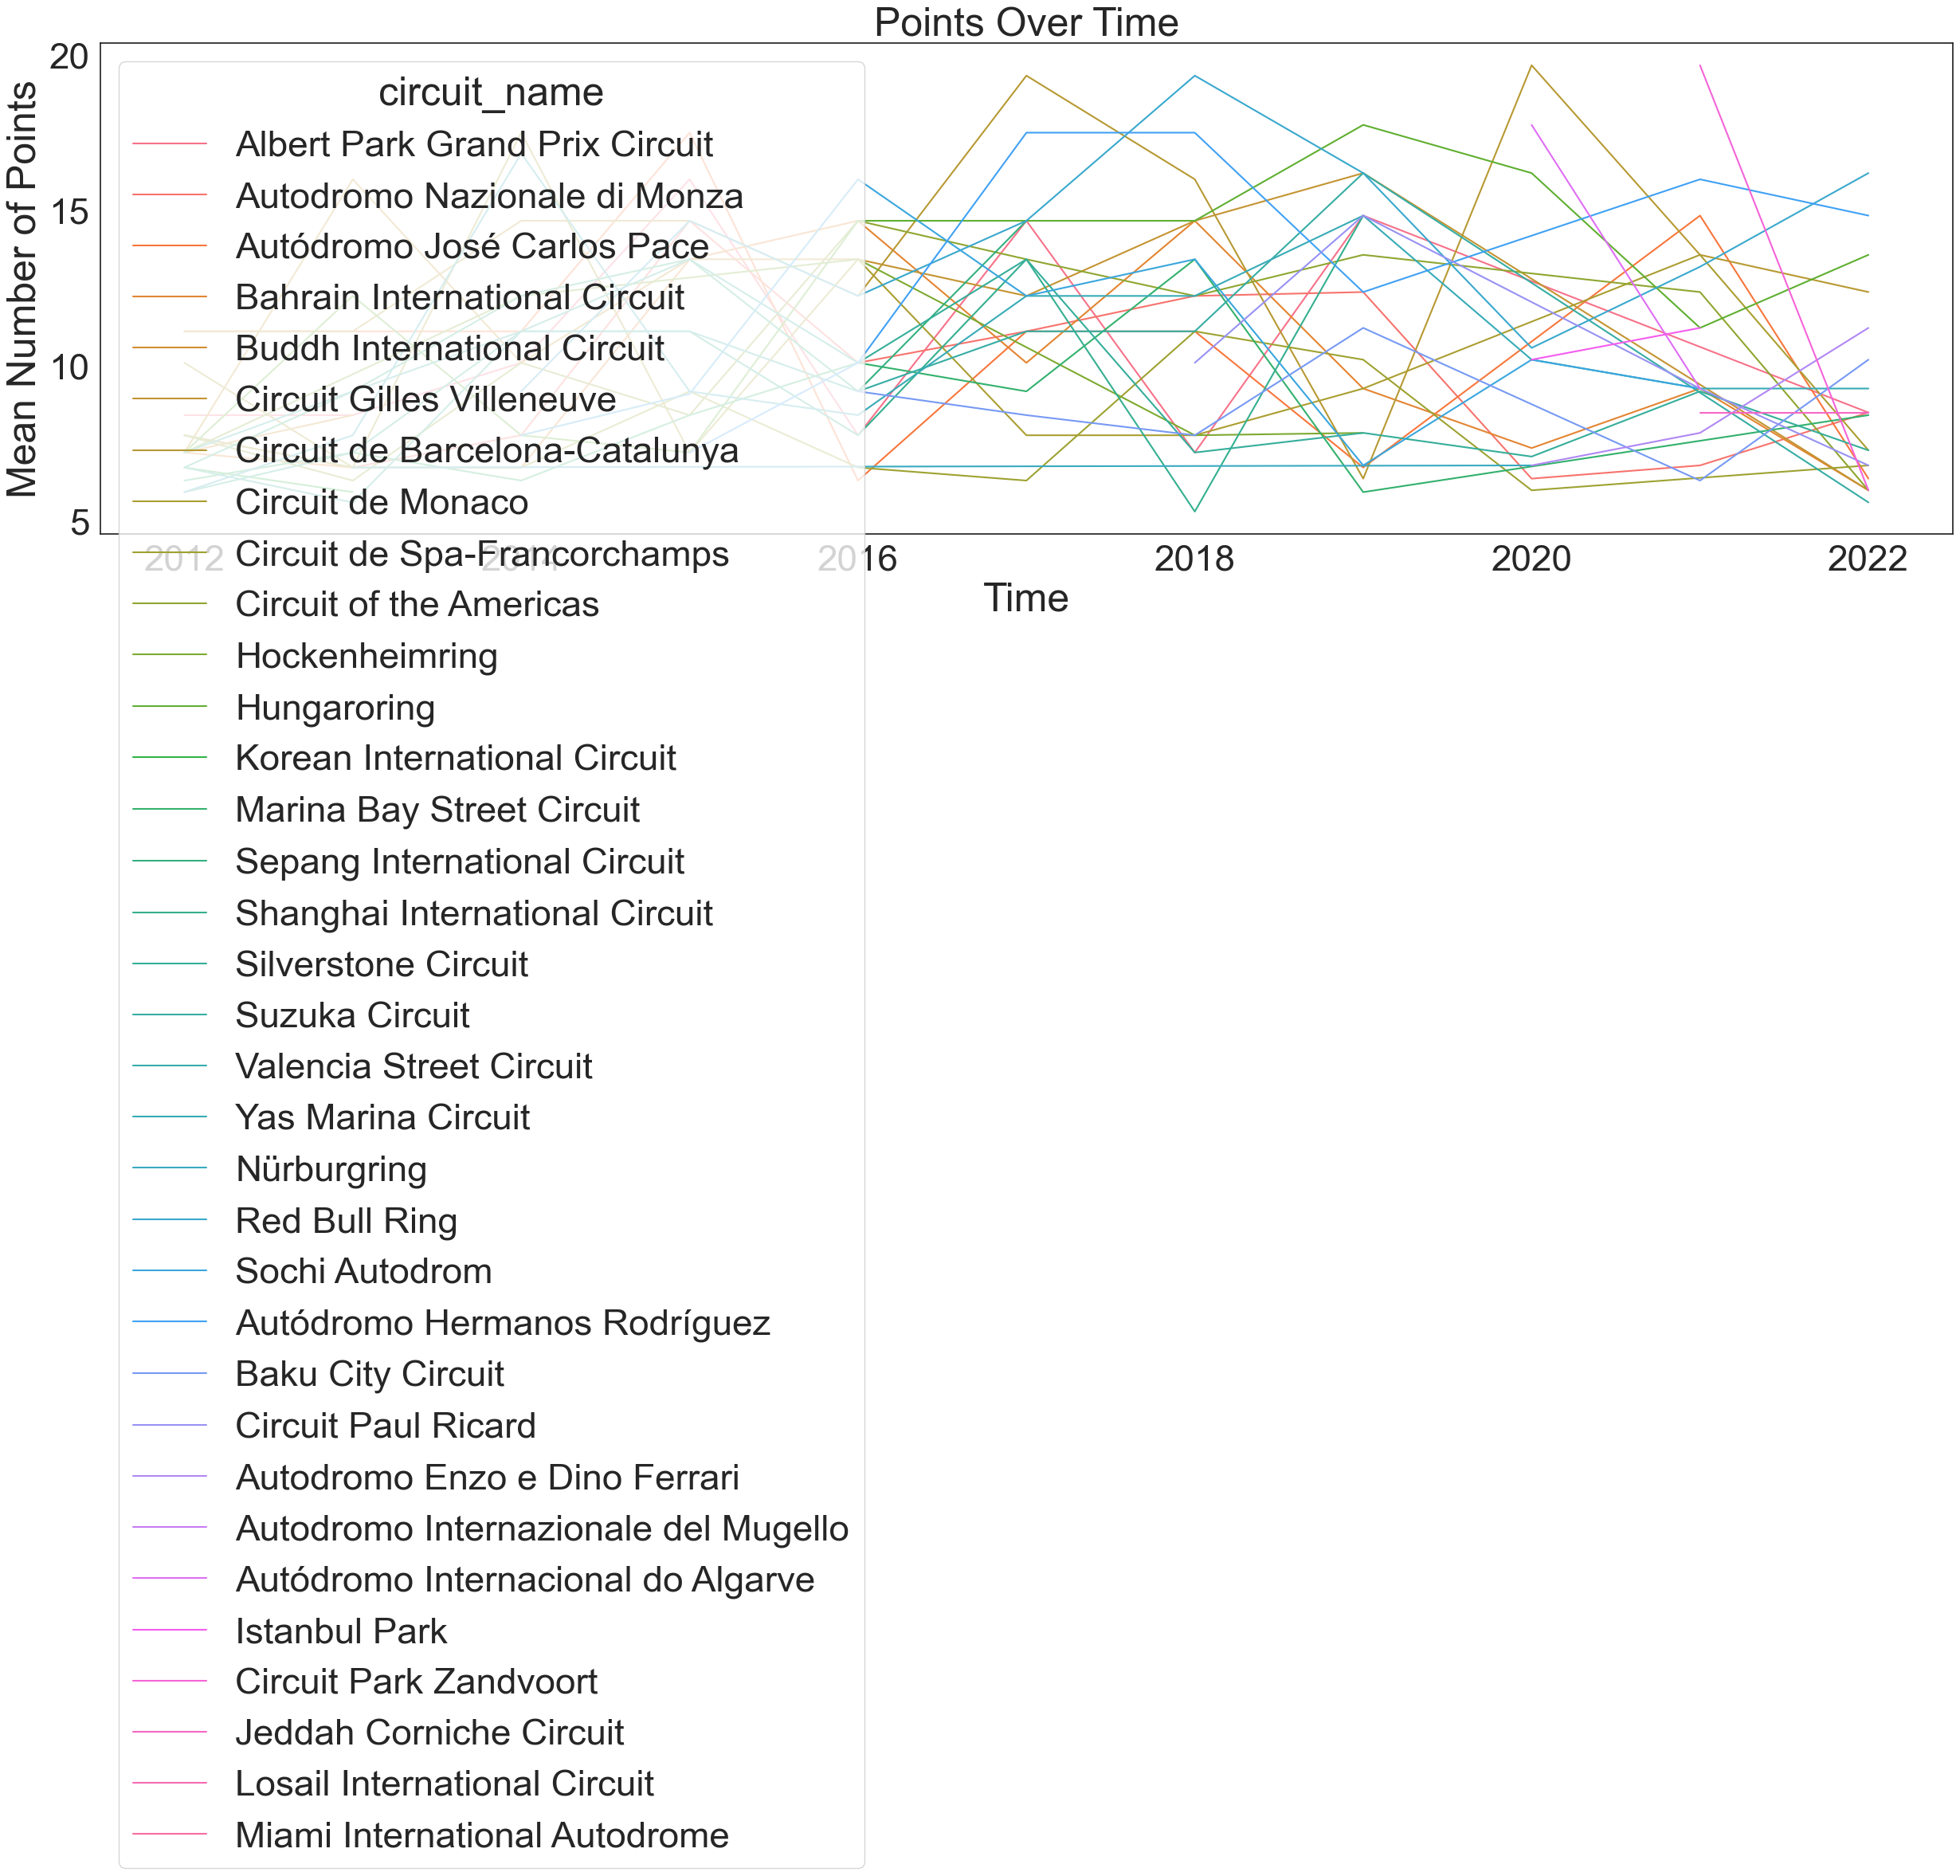

In [51]:
# we're interested in results, so we will look at mean_result_time and mean_points

# plot data

fig = plt.subplots(figsize = (30, 8))
fig = (sns.lineplot(x = 'year', y = 'mean_points', data = formula1_final, hue = 'circuit_name')
       .set(title = 'Points Over Time', xlabel = 'Time', ylabel = 'Mean Number of Points'))
sns.set_theme(style = 'white', font_scale = 3)
